In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 15 19:43:04 2019

Updated on Wed Jan 29 10:18:09 2020

@author: created by Sowmya Myneni and updated by Dijiang Huang

Modified on Thu, Jul 6, 2023 by Kai Chi
"""

# Overview
# We use the code from dataExtractor.py to create a train set and an test set in memory.
# Next, we preprocess the datasets using ColumnTransformer and StandardScaler. Note that we need to combine the two datasets when we do ColumnTransform in order that they have the same dimensions. We need to separate the two datasets before we do StandardScale in order to prevent data leakage.
# Then, we use the code from fnn_sample.py to do machine learning on the dataset.
# Finally, we print out the metrics.
# And we graph the training history.
# -KC

########################################
# Part 1 - Data Pre-Processing
#######################################

# To load a dataset file in Python, you can use Pandas. Import pandas using the line below
import pandas as pd
# Import numpy to perform operations on the dataset
import numpy as np

# Variable Setup
# Available datasets: KDDTrain+.txt, KDDTest+.txt, etc. More read Data Set Introduction.html within the NSL-KDD dataset folder
# Type the training dataset file name in ''
#TrainingDataPath='NSL-KDD/'
#TrainingData='KDDTrain+_20Percent.txt'
# Batch Size
BatchSize=10
# Epohe Size
NumEpoch=10

# Define variables
# Data file Path
DatasetPath='NSL-KDD/'
# Data file name
input_train = "KDDTrain+.txt"
input_test = "KDDTest+.txt"
file_extension = '.csv' # .csv or .txt
num_attack_class = 4 # total number of attack classes

#All attacks in NSL-KDD classed based on their attack classes: DoS, Prob, U2R, and R2L
attacks_subClass = [['apache2', 'back', 'land', 'neptune', 'mailbomb', 'pod', 'processtable', 'smurf', 'teardrop', 'udpstorm', 'worm'],
['ipsweep', 'mscan', 'portsweep', 'saint', 'satan'],
['buffer.overflow', 'loadmodule', 'perl', 'ps', 'rootkit', 'sqlattack', 'xterm'],
['ftp.write', 'guess.passwd', 'httptunnel', 'imap', 'multihop', 'named', 'phf', 'sendmail', 'snmpgetattack', 'spy', 'snmmpguess', 'warezclient', 'warezserver', 'xlock', 'xsnoop']
]

# selected training attack classes
training_attack_class_list = []
# selected testing attack classes
testing_attack_class_list = []
# generate file names
attack_class_1 = list(map(int, input("(Training Dataset) Please enter the attack class(es) that you want from the below list:\n(Note that you can choose one or multiple classes, e.g., 1 3, and input 0 means nothing is chosen) \na1 -> DoS (Enter 1 for this selection)\na2 -> Probe (Enter 2 for this selection)\na3 -> U2R (Enter 3 for this selection)\na4 -> R2L (Enter 4 for this selection)\n\n").split()))
attack_class_2 = list(map(int, input("(Testing Dataset) Please enter the attack class(es) that you want from the below list:\n(Note that you can choose one or multiple classes, e.g., 1 3, and input 0 means nothing is chosen) \na1 -> DoS (Enter 1 for this selection)\na2 -> Probe (Enter 2 for this selection)\na3 -> U2R (Enter 3 for this selection)\na4 -> R2L (Enter 4 for this selection)\n\n").split()))
file_extension = '.csv' # .csv or .txt
training_attack_class_list.append(attack_class_1)
testing_attack_class_list.append(attack_class_2)
print("Loading", input_train, "and", input_test, "files from the current folder where this script resides.....\n")

dataset_train = pd.read_csv(DatasetPath + input_train, header=None, encoding="ISO-8859-1")
dataset_test = pd.read_csv(DatasetPath + input_test, header=None, encoding="ISO-8859-1")
print("Loading Completed !\n")

X_train = dataset_train.iloc[:, :].values
X_test = dataset_test.iloc[:, :].values

print("Creating training set.....\n")
setA_train = []

# the following for loop choose selected attack classes and normal labeled data and put them into the setA_train.
if training_attack_class_list[0][0] != 0 and len(training_attack_class_list[0]) != num_attack_class:
    for i in range(len(X_train)):
        # exp., X_train[i, -2] is the label of attack subclass, and attacks_subClass[training_attack_class_list[0][j]-1] identify the selected attack class
        for j in range(len(training_attack_class_list[0])):
            if str.lower(str(X_train[i, -2])) in attacks_subClass[training_attack_class_list[0][j]-1] or str.lower(str(X_train[i,-2])) == 'normal':
                setA_train.append(X_train[i])
    ds1 = np.array(setA_train)
elif len(training_attack_class_list[0]) == num_attack_class:
    print("No changes is needed for training dataset!\n")
else:
    print("No attack classes are chosen, thus no new training file is created!\n")

print("Creating testing set.....\n")
setA_test = []
# the following for loop choose selected attack classes and normal labeled data and put them into the setA_train.
if testing_attack_class_list[0][0] != 0 and len(testing_attack_class_list[0]) != num_attack_class:
    for i in range(len(X_test)):
        # exp., X_train[i, -2] is the label of attack subclass, and attacks_subClass[training_attack_class_list[0][j]-1] identify the selected attack class
        for j in range(len(testing_attack_class_list[0])):
            if str.lower(str(X_test[i, -2])) in attacks_subClass[testing_attack_class_list[0][j]-1] or str.lower(str(X_test[i,-2])) == 'normal':
                setA_test.append(X_test[i])
    ds2 = np.array(setA_test)
elif len(testing_attack_class_list[0]) == num_attack_class:
    print("No changes is needed for testing dataset!\n")
else:
    print("No attack classes are chosen, thus no new training file is created!\n")

# Import dataset.
# Dataset is given in TraningData variable You can replace it with the file 
# path such as “C:\Users\...\dataset.csv’. 
# The file can be a .txt as well. 
# If the dataset file has header, then keep header=0 otherwise use header=none
# reference: https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/
#dataset = pd.read_csv(TrainingDataPath+TrainingData, header=None)

#X = dataset.iloc[:, 0:-2].values
#label_column = dataset.iloc[:, -2].values
#y = []
#for i in range(len(label_column)):
#    if label_column[i] == 'normal':
#        y.append(0)
#    else:
#        y.append(1)

# getting the useful columns X from the dataset
X_train = ds1[:,0:-2]
X_test = ds2[:,0:-2]
n1 = len(ds1[:,-2])
n2 = len(ds2[:,-2])
# getting the target variable y from the dataset
y_train = np.zeros(n1)
y_test = np.zeros(n2)
for i in range(n1):
    if ds1[i,-2]== 'normal':
        y_train[i] = 0
    else:
        y_train[i] = 1
for i in range(n2):
    if ds2[i,-2]== 'normal':
        y_test[i] = 0
    else:
        y_test[i] = 1

# Convert ist to array
#y = np.array(y)

# Encoding categorical data (convert letters/words in numbers)
# Reference: https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621
# The following code work without warning in Python 3.6 or older. Newer versions suggest to use ColumnTransformer
'''
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])
X[:, 2] = le.fit_transform(X[:, 2])
X[:, 3] = le.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [1, 2, 3])
X = onehotencoder.fit_transform(X).toarray()
'''
# The following code work Python 3.7 or newer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), [1,2,3])],    # The column numbers to be transformed ([1, 2, 3] represents three columns to be transferred)
    remainder='passthrough'                         # Leave the rest of the columns untouched
)
#X = np.array(ct.fit_transform(X), dtype=float)
X = np.vstack((X_train, X_test))
X = np.array(ct.fit_transform(X), dtype=float)
X_train = X[0:n1,:]
X_test = X[n1:n1+n2,:]

# Splitting the dataset into the Training set and Test set (75% of data are used for training)
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


# Perform feature scaling. For ANN you can use StandardScaler, for RNNs recommended is 
# MinMaxScaler. 
# referece: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# https://scikit-learn.org/stable/modules/preprocessing.html
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # Scaling to the range [0,1]
X_test = sc.fit_transform(X_test)

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)


(Training Dataset) Please enter the attack class(es) that you want from the below list:
(Note that you can choose one or multiple classes, e.g., 1 3, and input 0 means nothing is chosen) 
a1 -> DoS (Enter 1 for this selection)
a2 -> Probe (Enter 2 for this selection)
a3 -> U2R (Enter 3 for this selection)
a4 -> R2L (Enter 4 for this selection)

1 2
(Testing Dataset) Please enter the attack class(es) that you want from the below list:
(Note that you can choose one or multiple classes, e.g., 1 3, and input 0 means nothing is chosen) 
a1 -> DoS (Enter 1 for this selection)
a2 -> Probe (Enter 2 for this selection)
a3 -> U2R (Enter 3 for this selection)
a4 -> R2L (Enter 4 for this selection)

1 2 3
Loading KDDTrain+.txt and KDDTest+.txt files from the current folder where this script resides.....

Loading Completed !

Creating training set.....

Creating testing set.....

(190776, 122) (190776,) (38988, 122) (38988,)


In [2]:
########################################
# Part 2: Building FNN
#######################################

# Importing the Keras libraries and packages
#import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
# Reference: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
classifier = Sequential()

# Adding the input layer and the first hidden layer, 6 nodes, input_dim specifies the number of variables
# rectified linear unit activation function relu, reference: https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = len(X_train[0])))

# Adding the second hidden layer, 6 nodes
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer, 1 node, 
# sigmoid on the output layer is to ensure the network output is between 0 and 1
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN, 
# Gradient descent algorithm “adam“, Reference: https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
# This loss is for a binary classification problems and is defined in Keras as “binary_crossentropy“, Reference: https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
# Train the model so that it learns a good (or good enough) mapping of rows of input data to the output classification.
# add verbose=0 to turn off the progress report during the training
# To run the whole training dataset as one Batch, assign batch size: BatchSize=X_train.shape[0]
classifierHistory = classifier.fit(X_train, y_train, batch_size = BatchSize, epochs = NumEpoch)

# evaluate the keras model for the provided model and dataset
loss, accuracy = classifier.evaluate(X_train, y_train)
print('Print the loss and the accuracy of the model on the dataset')
print('Loss [0,1]: %.4f' % (loss), 'Accuracy [0,1]: %.4f' % (accuracy))

Epoch 1/10
19078/19078 [==============================] - 23s 1ms/step - loss: 0.0396 - accuracy: 0.9840
Epoch 2/10
19078/19078 [==============================] - 25s 1ms/step - loss: 0.0156 - accuracy: 0.9938
Epoch 3/10
19078/19078 [==============================] - 27s 1ms/step - loss: 0.0130 - accuracy: 0.9956
Epoch 4/10
19078/19078 [==============================] - 25s 1ms/step - loss: 0.0122 - accuracy: 0.9960
Epoch 5/10
19078/19078 [==============================] - 22s 1ms/step - loss: 0.0114 - accuracy: 0.9962
Epoch 6/10
19078/19078 [==============================] - 22s 1ms/step - loss: 0.0125 - accuracy: 0.9967
Epoch 7/10
19078/19078 [==============================] - 27s 1ms/step - loss: 0.0110 - accuracy: 0.9968
Epoch 8/10
19078/19078 [==============================] - 27s 1ms/step - loss: 0.0103 - accuracy: 0.9970
Epoch 9/10
19078/19078 [==============================] - 30s 2ms/step - loss: 0.0104 - accuracy: 0.9971
Epoch 10/10
5962/5962 [==============================] 

In [3]:
########################################
# Part 3 - Making predictions and evaluating the model
#######################################

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.9)   # y_pred is 0 if less than 0.9 or equal to 0.9, y_pred is 1 if it is greater than 0.9
# summarize the first 5 cases
#for i in range(5):
#	print('%s => %d (expected %d)' % (X_test[i].tolist(), y_pred[i], y_test[i]))

# Making the Confusion Matrix
# [TN, FP ]
# [FN, TP ]
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print('Print the Confusion Matrix:')
print('[ TN, FP ]')
print('[ FN, TP ]=')
print(cm)
print('Accurracy = %f' % accuracy_score(y_test, y_pred))
print('Precision = %f' % precision_score(y_test, y_pred))
print('Recall = %f' % recall_score(y_test, y_pred))

Print the Confusion Matrix:
[ TN, FP ]
[ FN, TP ]=
[[26970  2163]
 [ 1384  8471]]
Accurracy = 0.909023
Precision = 0.796596
Recall = 0.859564


Plot the accuracy


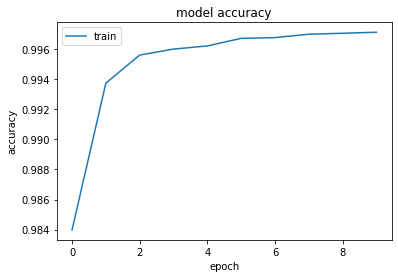

Plot the loss


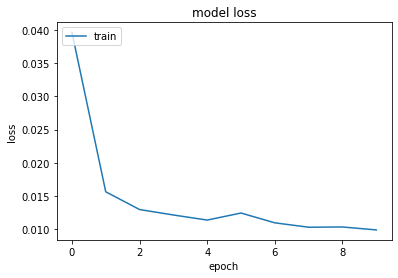

In [4]:
########################################
# Part 4 - Visualizing
#######################################

# Import matplot lib libraries for plotting the figures. 
import matplotlib.pyplot as plt

# You can plot the accuracy
print('Plot the accuracy')
# Keras 2.2.4 recognizes 'acc' and 2.3.1 recognizes 'accuracy'
# use the command python -c 'import keras; print(keras.__version__)' on MAC or Linux to check Keras' version
plt.plot(classifierHistory.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.savefig('accuracy_sample.png')
plt.show()

# You can plot history for loss
print('Plot the loss')
plt.plot(classifierHistory.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.savefig('loss_sample.png')
plt.show()
